In [3]:
%matplotlib inline

PyGSM quickstart - 2016 version
-------------------------------

Zheng et. al. released an updated sky model here: https://github.com/jeffzhen/gsm2016

The paper is up on Arxiv:

#### An Improved Model of Diffuse Galactic Radio Emission from 10 MHz to 5 THz
###### H. Zheng (MIT), M. Tegmark, J. Dillon, A. Liu, A. Neben, J. Jonas, P. Reich, W.Reich
http://arxiv.org/abs/1605.04920

This notebook is the (beta) testing/documentation for the PyGSM port.

Firstly, we import the `pygsm` module:

In [5]:
from pygsm import GlobalSkyModel2016
from pygsm import GlobalSkyModel

We can very quickly get started with generating a sky map and plotting it:

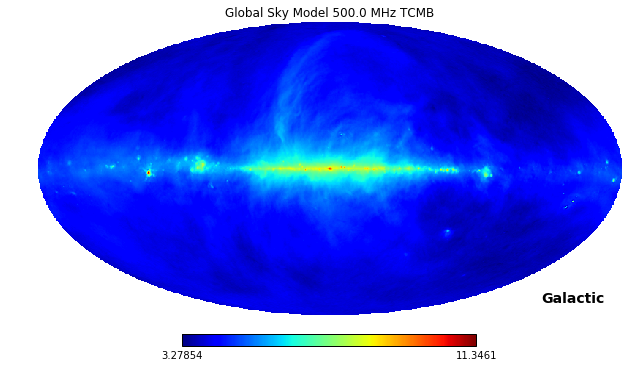

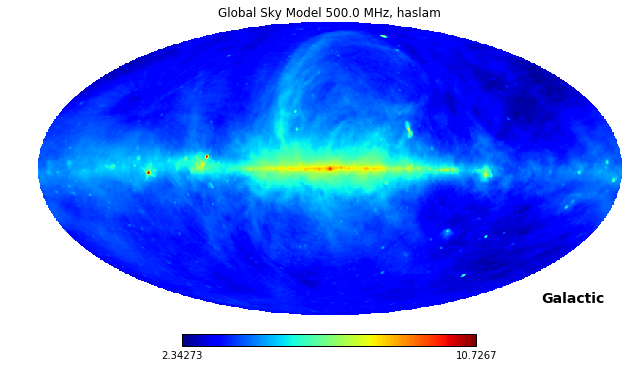

In [7]:
gsm_2016 = GlobalSkyModel2016(freq_unit='MHz')
gsm_2016.generate(500)
gsm_2016.view(logged=True)

# Compare to 2008 De-Olivera Costa version
gsm_2008 = GlobalSkyModel(freq_unit='MHz')
gsm_2008.generate(500)
gsm_2008.view(logged=True)

We might then want to write this to a FITS file (in healpix format):

In [8]:
gsm_2016.write_fits("gsm_500mhz.fits")

        Use :meth:`BinTableHDU.from_columns` for new BINARY tables or :meth:`TableHDU.from_columns` for new ASCII tables instead. [astropy.utils.decorators]
        Use :meth:`BinTableHDU.from_columns` for new BINARY tables or :meth:`TableHDU.from_columns` for new ASCII tables instead.


There are also a few options we can play around with. For example:

* let's change to use a different interpolation method (pchip) 
* instead of using the Haslam 408 MHz map for structure, let's use WMAP 23 GHz
* instead of using MHz to define the units, let's use GHz

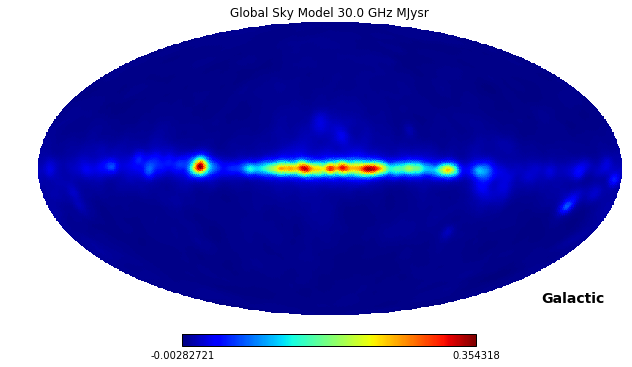

In [12]:
gsm = GlobalSkyModel2016(freq_unit='GHz', unit='MJysr', resolution='low')
gsm.generate(30) # Generate at 30 GHz
gsm.view(logged=False)

You can set things on the fly, too, once you've got a `gsm` object:

Just in case you're interested in spectral cubes, you can even pass a frequency range:

(10, 12582912)


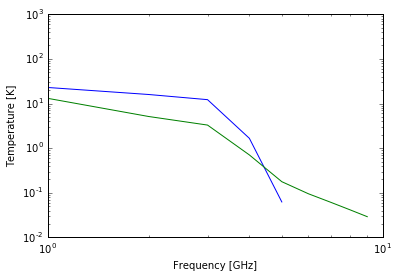

In [15]:
gsm = GlobalSkyModel2016(freq_unit='GHz')
freqs = np.linspace(0.1, 4, 10)
map_cube = gsm.generate(freqs)

print map_cube.shape
plt.loglog(map_cube[:,100])  # Random pixel
plt.loglog(map_cube[:,12345]) # Another random pixel
plt.xlabel("Frequency [GHz]")
plt.ylabel("Temperature [K]")

Be careful with this one though, as it can eat up a lot of memory!

## Generate observed sky for a given lat, long

A common task is to find out what the sky looks like at a given lat, long and date. `PyGSM` gives a quick method to do this:

In [17]:
from pygsm import GSMObserver2016, GSMObserver
from datetime import datetime

# Setup observatory location - in this case, Parkes Australia
(latitude, longitude, elevation) = ('-32.998370', '148.263659', 100)
ov = GSMObserver2016()
ov.lon = longitude
ov.lat = latitude
ov.elev = elevation
ov.date = datetime(2000, 1, 1, 23, 0)

Now generate a sky model and view an all-sky orthographic plot

/usr/local/lib/python2.7/site-packages/pygsm-2.0.0-py2.7.egg/pygsm/pygsm2016.py:279: RuntimeWarning: invalid value encountered in log2
/usr/local/lib/python2.7/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


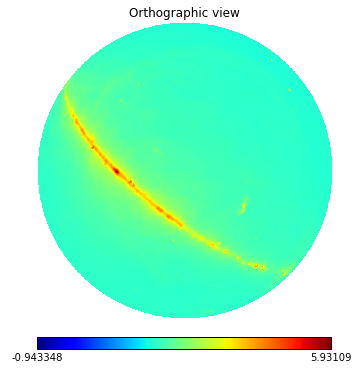

In [18]:
ov.generate(1400)
d = ov.view(logged=True)

And we can view galactic Mollweide projection too, with below-horizon data blanked out:

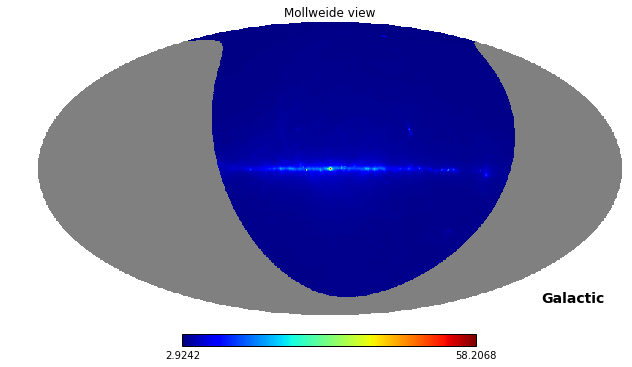

In [19]:
d = ov.view_observed_gsm()